# 6. Linear regression

## First regression example

Previously, we have studied only classification problems, where the target variable to be predicted is a categorical one, indicating class membership. However, sometimes we might wish to model a situation where the target variable is a continuously varying numerical quantity. As an example, we might be interested in predicting the monthly electricity bill of a household, given the number of rooms, the total square footage, and a list of household appliances etc. as input features. Such problems define a separate group within supervised learning known as **regression problems**. 

As is the case with classification problems, there are several alternative algorithms to choose from when solving regression problems in machine learning. However, the most popular and widely used of them is **linear regression**. This is our next topic.

For easy visualization, we choose a very simple dataset with only two columns of data: the size of TV advertising budget (in thousands of dollars) and the sales revenue (in millions of dollars). Our task is to predict the sales (continuously varying target variable), given the amount of TV advertising as the only input feature. Let us start by downloading the dataset:

In [20]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('datasets/advertising/tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


There are altogether 200 samples in this dataset. Because of the simplicity of this example, we can conveniently study the relationship between the input variable and the target variable in a simple graph:

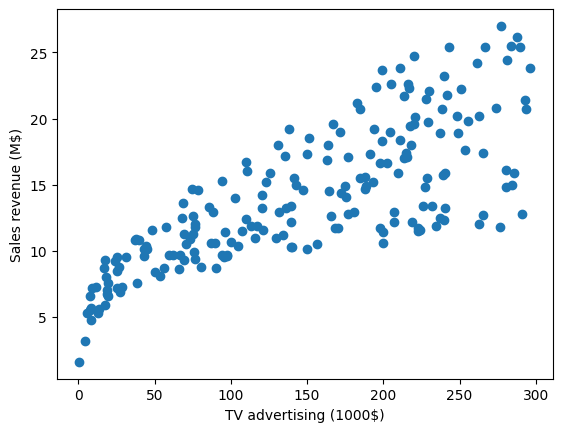

In [21]:
import matplotlib.pyplot as plt

X = df.drop(columns='Sales') # inputs
y = df['Sales'] # targets
plt.scatter(X, y)
plt.xlabel('TV advertising (1000$)')
plt.ylabel('Sales revenue (M$)')
plt.show()

Evidently, there is quite a bit of variation in the data, but an overall increasing trend is clearly visible. In linear regression, the relationship between the input feature $x$ and output feature $y$ is assumed to be of a particular simple linear form:

$$
y = \beta_{0} + \beta_{1} x,
$$
where the numerical values of the model parameters ($\beta_{0}$ and $\beta_{1}$) are automatically determined to get the best fit (in a sense defined precisely below) with the training data.  

In Scikit-learn, building a regression model, training it, and using it to make predictions is very similar to what we already have become accustomed to:

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

We can find out the trained values for the model parameters as follows:

In [23]:
b0 = model.intercept_ # note the underscore!
b1 = model.coef_[0] # returns a list containing a single element
print("Intercept: %.2f" % b0 + ", Coefficient: %.4f" % b1)

Intercept: 7.03, Coefficient: 0.0475


Next, let us draw the trendline corresponding to our regression model on top of our training data:

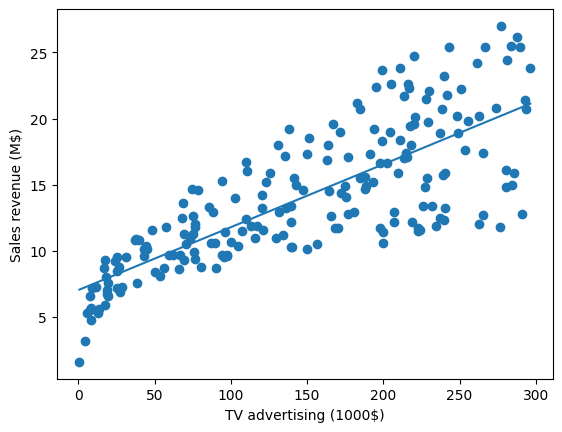

In [25]:
xs = np.linspace(X.min(), X.max())
ys = b0 + b1 * xs
plt.plot(xs, ys)
plt.scatter(X, y)
plt.xlabel('TV advertising (1000$)')
plt.ylabel('Sales revenue (M$)')
plt.show()

Now we can use our model to calculate predictions for sales revenue $y$ with any given advertising budget $x$ just by computing the value of the linear expression, or by finding the corresponding point on the straight line shown above. Before doing so, however, let us first discuss the process of how the model parameters are determined.

## Finding the model parameters

How precisely are the numerical values for the model parameters found? What is the criterion that determines the *best* fit with the available training data?

Consider a dataset with $N$ training samples, where $x^{(i)}$ denotes the input value and $y^{(i)}$ the known (true) target value for a particular sample denoted by an index $i = 1, ..., N$. Next, assume that you pick some values for the model parameters $\beta_{0}$ and $\beta_{1}$; with this model, the predicted target value $y$ for this sample would be

$$
y = \beta_{0} + \beta_{1} x^{(i)}
$$
which, in general, differs from the true value $y^{(i)}$. To quantify the prediction error, take the difference between $y$ and $y^{(i)}$, square it (to make sure the error is always positive), and take the average over the entire training set. The resulting quantity is called the **mean squared error** (MSE):

$$
{\rm MSE} = \frac{1}{N} \sum_{i = 1}^{N} \left( y - y^{(i)} \right)^2 = \frac{1}{N} \sum_{i = 1}^{N} \left( \beta_{0} + \beta_{1} x^{(i)} - y^{(i)} \right)^2
$$ 
Of course, the value of MSE depends on the model parameters $\beta_{0}$ and $\beta_{1}$: large MSE indicates large prediction errors and poor model performance. In linear regression, the model parameters are chosen so that *the mean squared error is minimized*. Usually the details of how this minimization problem is solved in practice is hidden from the user, but it is useful to know that it takes place "under the hood".

**NOTE:** It is fairly common in machine learning that a model's parameters are determined during training so that a certain mathematical expression (such as MSE here) quantifying the prediction errors acquires its minimum value. Such expressions are usually referred to as **loss functions** or **cost functions**. The process of solving this optimization problem is often called *minimizing the loss* (or cost).

So far we have only considered the situation with only one input feature $x$. The generalization of linear regression to any number $M$ of input variables $x_{1}, x_{2}, ... x_{M}$, however, is entirely straightforward: the mathematical expression for the target value prediction

$$
y = \beta_{0} + \beta_{1} x_{1}^{(i)} + \beta_{2} x_{2}^{(i)} + ... + \beta_{M} x_{M}^{(i)}
$$
is still of linear form, but now contains separate coefficients for each input feature. After training the model, the intercept $\beta_{0}$ and the list of coefficients $\beta_{1}, \beta_{2}, ...  \beta_{M}$ can be accessed as in the simple example above (the list returned by `model.coef_` then consisted of a single element only).

## Regression metrics

What kind of quantities are useful for indicating the performance of a regression model? Evidently, the metrics discussed in the context of classification problems (confusion matrices, accuracy etc.) are no longer meaningful when dealing with regression problems: there is e.g. no "percentage of correct predictions" with continuously varying targets.

Instead, a widely used and easy-to-understand metric for assessing regression models is the **mean absolute error** (MAE), defined as

$$
{\rm MAE} = \frac{1}{N_t} \sum_{i = 1}^{N_t} \vert y - y^{(i)} \vert
$$ 
where the model predictions $y$ are compared with the true target values $y^{(i)}$ for the $N_t$ samples in the test set used for validation purposes. 

For simplicity (and because of the small size of the dataset), we calculate here the mean absolute error for our example problem using the same set we have used for training the model: 


In [26]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(X)

print("Mean absolute error: %.2f" % mean_absolute_error(y, preds))

Mean absolute error: 2.55


On average, the predicted sales revenues differ from the true ones by 2,55 million dollars.

**NOTE:** Models should never be validated using the same set they have been trained with. The metrics should always be calculated with fresh samples the model has not been subjected to during training.